In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments 

import seaborn as sns # theme & dataset
print(f'Matplotlib Version : {mpl.__version__}')
print(f'Seaborn Version : {sns.__version__}')

# for visualization samples
import pandas as pd

netflix_titles = pd.read_csv('datasets/netflix_titles.csv')

Matplotlib Version : 3.5.2
Seaborn Version : 0.11.2


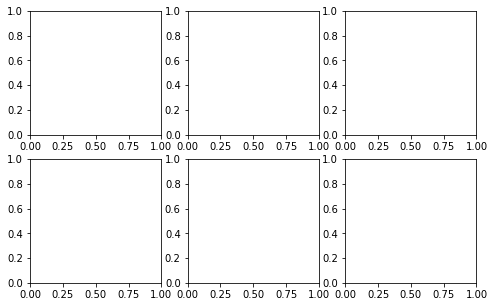

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.show()

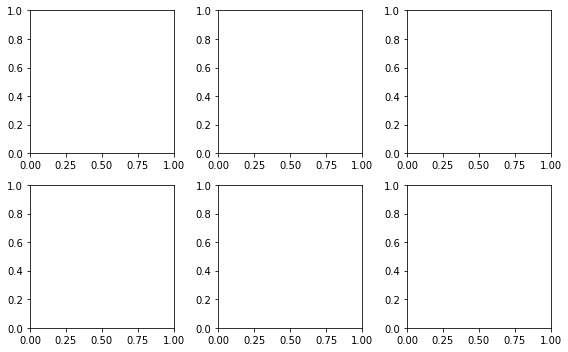

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.tight_layout()
plt.show()

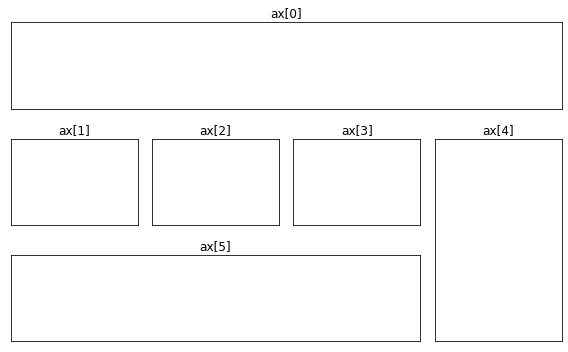

In [5]:
# with subplot2grid

fig = plt.figure(figsize=(8, 5)) # initialize figure

ax = [None for _ in range(6)] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)


for ix in range(6): 
    ax[ix].set_title('ax[{}]'.format(ix)) # make ax title for distinguish:)
    ax[ix].set_xticks([]) # to remove x ticks
    ax[ix].set_yticks([]) # to remove y ticks
    
fig.tight_layout()
plt.show()

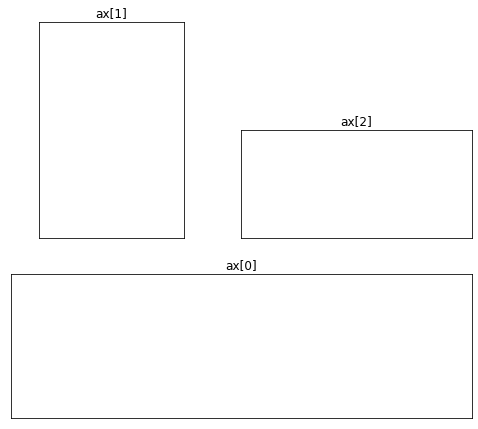

In [6]:
fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(3)]


ax[0] = fig.add_axes([0.1,0.1,0.8,0.4]) # x, y, dx, dy
ax[1] = fig.add_axes([0.15,0.6,0.25,0.6])
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.show()

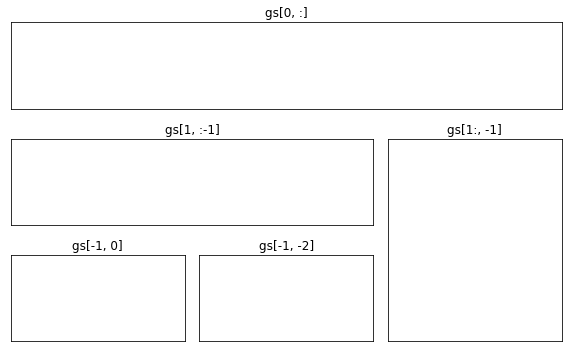

In [7]:
fig = plt.figure(figsize=(8, 5))

gs = fig.add_gridspec(3, 3) # make 3 by 3 grid (row, col)

ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(gs[0, :]) 
ax[0].set_title('gs[0, :]')

ax[1] = fig.add_subplot(gs[1, :-1])
ax[1].set_title('gs[1, :-1]')

ax[2] = fig.add_subplot(gs[1:, -1])
ax[2].set_title('gs[1:, -1]')

ax[3] = fig.add_subplot(gs[-1, 0])
ax[3].set_title('gs[-1, 0]')

ax[4] = fig.add_subplot(gs[-1, -2])
ax[4].set_title('gs[-1, -2]')

for ix in range(5):
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.tight_layout()
plt.show()

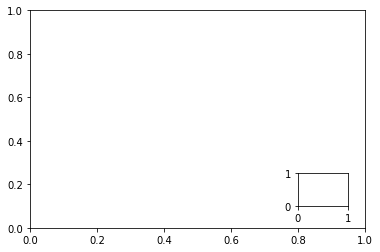

In [8]:
fig, ax = plt.subplots()
axin1 = ax.inset_axes([0.8, 0.1, 0.15, 0.15])
plt.show()

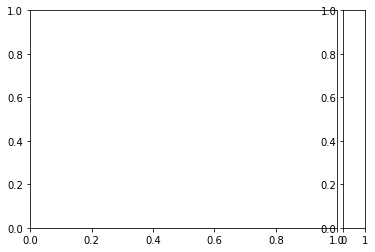

In [9]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1, 1)
ax_divider = make_axes_locatable(ax)

ax = ax_divider.append_axes("right", size="7%", pad="2%")
plt.show()

In [11]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'{ctype} Colormap', fontweight='bold', fontsize=8)
    plt.show()

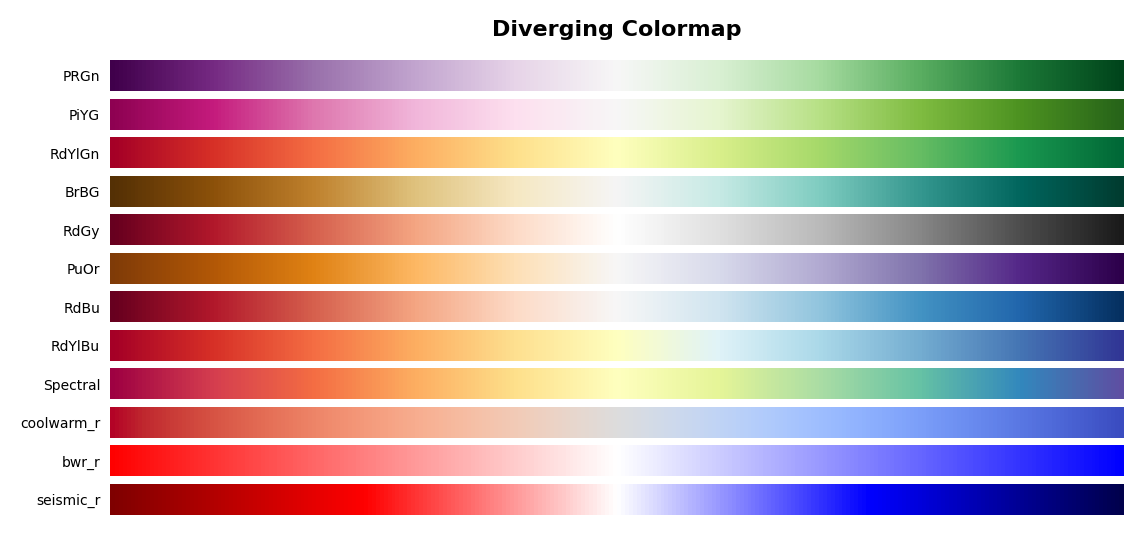

In [12]:
# _r mean reverse
diverge_cmap = ('PRGn', 'PiYG', 'RdYlGn', 'BrBG', 'RdGy', 'PuOr', 'RdBu', 'RdYlBu',  'Spectral', 'coolwarm_r', 'bwr_r', 'seismic_r')
cmap_plot(diverge_cmap, 'Diverging')

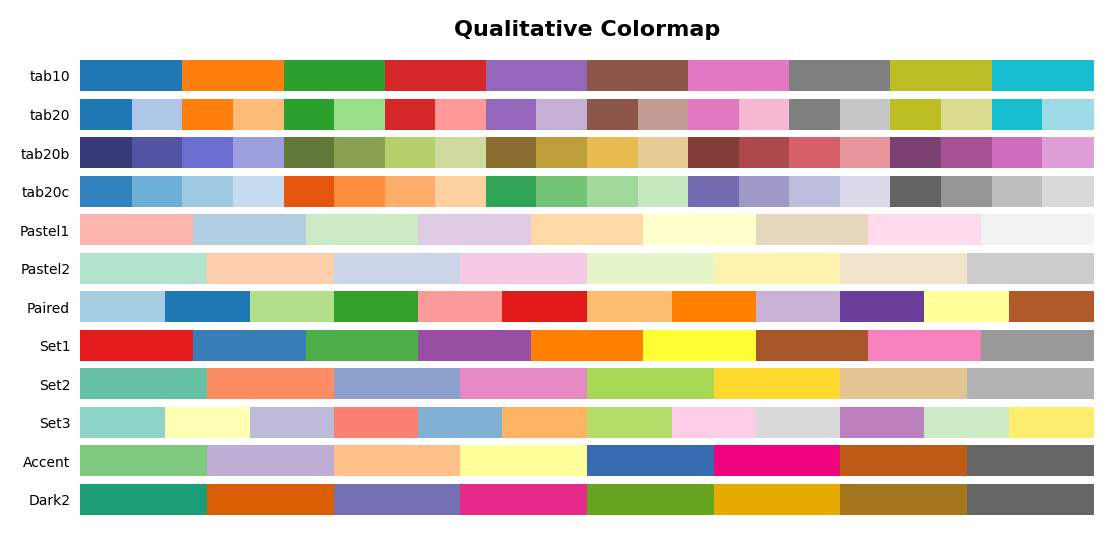

In [13]:
qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c',
         'Pastel1', 'Pastel2', 'Paired',
         'Set1', 'Set2', 'Set3', 'Accent', 'Dark2' )

cmap_plot(qualitative_cmap, 'Qualitative')

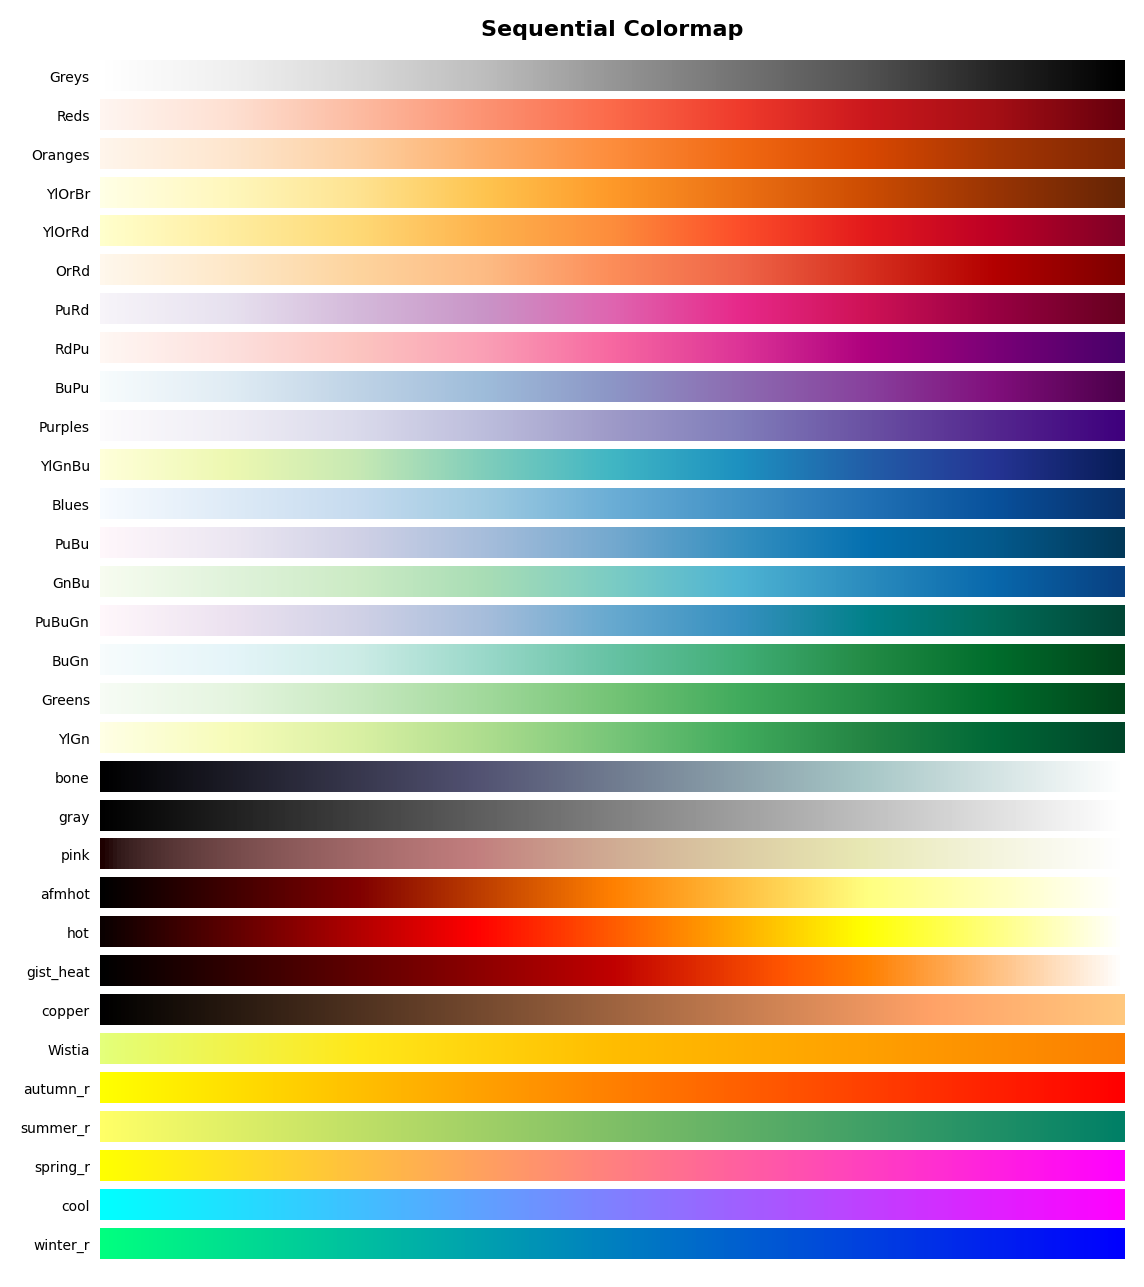

In [14]:
sequential_cmap = ('Greys', 'Reds', 'Oranges', 
         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
         'Purples', 'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 'BuGn',
         'Greens', 'YlGn','bone', 'gray', 'pink', 'afmhot', 'hot', 'gist_heat', 'copper', 
         'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r')            

cmap_plot(sequential_cmap, 'Sequential')

In [15]:
netflix_date = netflix_titles[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

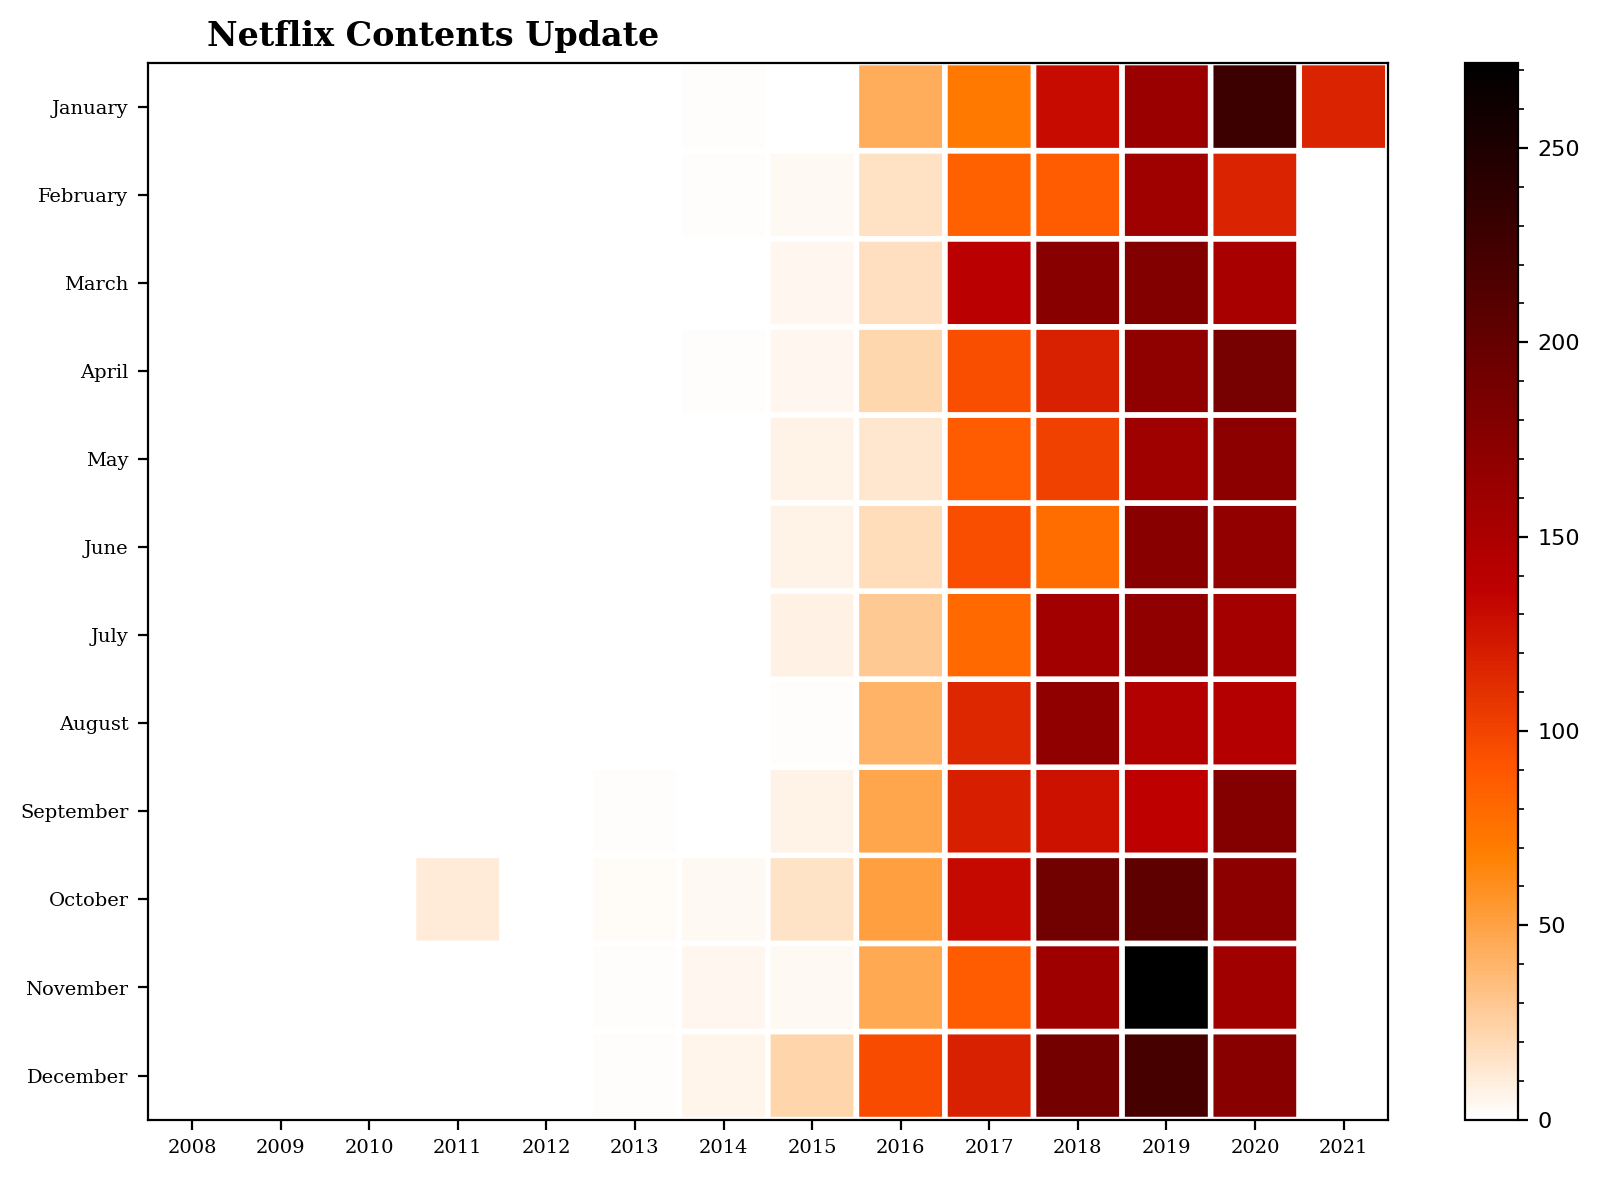

In [16]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.23, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

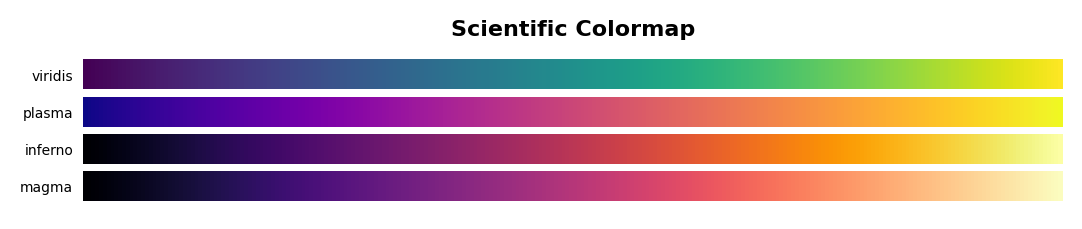

In [17]:
scientific_cmap = ('viridis', 'plasma', 'inferno', 'magma')
cmap_plot(scientific_cmap, 'Scientific')

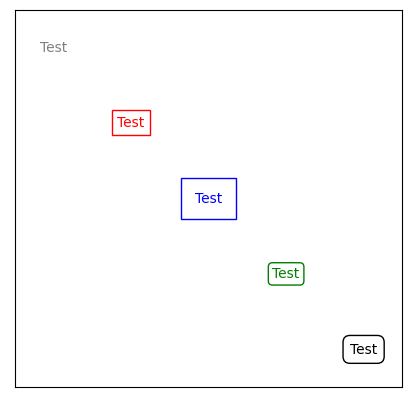

In [18]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

## Gray Box
ax.text(0.1, 0.9, 'Test', color='gray', va="center", ha="center")

## Red Box
ax.text(0.3, 0.7, 'Test', color='red', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='red'))

## Blue Box
ax.text(0.5, 0.5, 'Test', color='blue', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='blue', pad=10.0))

# Green Box
ax.text(0.7, 0.3, 'Test', color='green', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))

# Black
ax.text(0.9, 0.1, 'Test', color='black', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round, pad=0.5'))

ax.set_xticks([])
ax.set_yticks([])

plt.show()

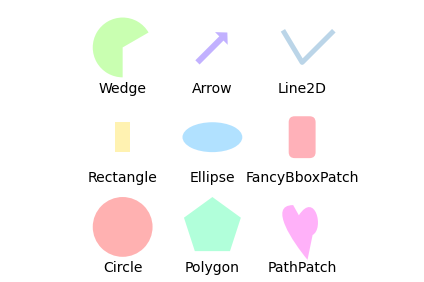

In [19]:
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection


def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)


fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add a rectangle
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

# add a wedge
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge)
label(grid[2], "Wedge")

# add a Polygon
polygon = mpatches.RegularPolygon(grid[3], 5, 0.1)
patches.append(polygon)
label(grid[3], "Polygon")

# add an ellipse
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add an arrow
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1,
                       width=0.1)
patches.append(arrow)
label(grid[5], "Arrow")

# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
label(grid[7], "FancyBboxPatch")

# add a line
x, y = np.array([[-0.06, 0.0, 0.1], [0.05, -0.05, 0.05]])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))
ax.add_collection(collection)
ax.add_line(line)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()